# Lab 4: Data Visualization and EDA

#### CPE232 Data Models

---

## **WISIT SUWANNAO 67070501042**

1. Load all Superstore datasets.

*Note: The same datasets used in Lab 3*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set option to display all columns
pd.set_option('display.max_columns', None)

# Set visual aesthetic for plots
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Load all Superstore datasets
df_orders = pd.read_csv('Superstore/superstore_order.csv')
df_people = pd.read_csv('Superstore/superstore_people.csv')
df_returns = pd.read_csv('Superstore/superstore_return.csv')

print("All datasets have been loaded successfully.")

All datasets have been loaded successfully.


2. Determine shape of each dataset (print out the results as well).

In [2]:
# Determine and print the shape of each dataset
print(f"Shape of Superstore Order: {df_orders.shape}")
print(f"Shape of Superstore People: {df_people.shape}")
print(f"Shape of Superstore Return: {df_returns.shape}")

Shape of Superstore Order: (8880, 21)
Shape of Superstore People: (4, 2)
Shape of Superstore Return: (296, 2)


3. Show information of the dataset.


In [3]:
# Show information of the datasets
print("="*30)
print("Superstore Order Information")
print("="*30)
df_orders.info()

print("\n" + "="*30)
print("Superstore People Information")
print("="*30)
df_people.info()

print("\n" + "="*30)
print("Superstore Return Information")
print("="*30)
df_returns.info()

Superstore Order Information
<class 'pandas.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         8880 non-null   int64  
 1   Order ID       8880 non-null   str    
 2   Order Date     8880 non-null   str    
 3   Ship Date      8880 non-null   str    
 4   Ship Mode      8880 non-null   str    
 5   Customer ID    8880 non-null   str    
 6   Customer Name  8880 non-null   str    
 7   Segment        8880 non-null   str    
 8   Country        8880 non-null   str    
 9   City           8880 non-null   str    
 10  State          8880 non-null   str    
 11  Postal Code    8880 non-null   int64  
 12  Region         8880 non-null   str    
 13  Product ID     8880 non-null   str    
 14  Category       8880 non-null   str    
 15  Sub-Category   8880 non-null   str    
 16  Product Name   8880 non-null   str    
 17  Sales          8880 non-null   flo

In [4]:
# Check for missing values in all datasets
print("Missing values in Orders:")
print(df_orders.isnull().sum()[df_orders.isnull().sum() > 0])

print("\nMissing values in People:")
print(df_people.isnull().sum()[df_people.isnull().sum() > 0])

print("\nMissing values in Returns:")
print(df_returns.isnull().sum()[df_returns.isnull().sum() > 0])

Missing values in Orders:
Series([], dtype: int64)

Missing values in People:
Series([], dtype: int64)

Missing values in Returns:
Series([], dtype: int64)


4. Are there any missing values? If so, in which column?

Ans: No, there are no missing values in any of the datasets (Orders, People, Returns).

5.
- 5.1 List unique segments
- 5.2 List unique segments and their corresponding count
- 5.3 Create a pie chart to demonstrate unique segments and their count
- 5.4 Briefly describe what could be interpreted from this pie chart

*Note: please create additional cells to answer 5.2 - 5.3*

In [5]:
# 5.1 List unique segments
unique_segments = df_orders['Segment'].unique()
print(f"5.1 Unique Segments: {unique_segments}")

5.1 Unique Segments: <StringArray>
['Consumer', 'Corporate', 'Home Office']
Length: 3, dtype: str


In [6]:
# 5.2 List unique segments and their corresponding count
print("5.2 Segment Counts:")
segment_counts = df_orders['Segment'].value_counts()
print(segment_counts)

5.2 Segment Counts:
Segment
Consumer       4613
Corporate      2673
Home Office    1594
Name: count, dtype: int64


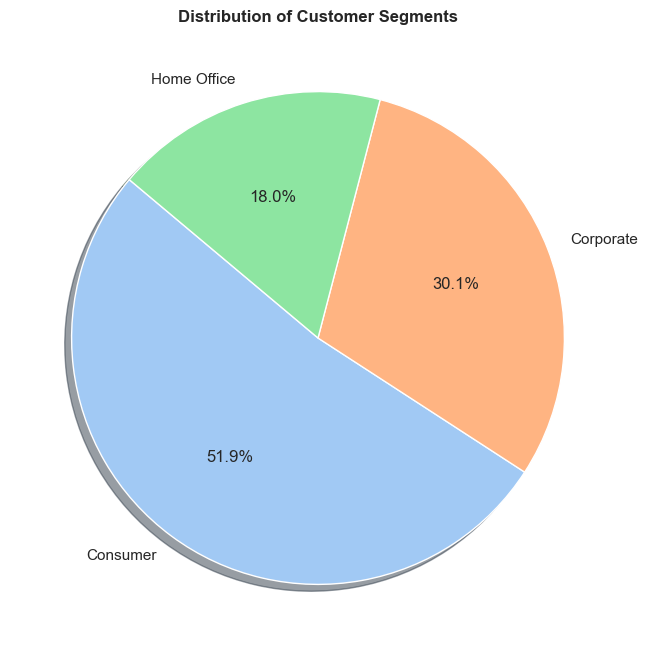

In [7]:
# 5.3 Create a pie chart to demonstrate unique segments and their count
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette('pastel'), shadow=True)

plt.title('Distribution of Customer Segments', weight='bold')
plt.show()

Answer for the question 5.4

Ans: 
*   **Consumer Dominance:** The **Consumer** segment is the largest, accounting for over **50%** of total transactions. This indicates the primary revenue stream comes from individual B2C sales.
*   **Corporate & Home Office:** The **Corporate** and **Home Office** segments combined make up the remaining ~48%. While smaller individually, they represent a significant B2B portion. 
*   **Strategy Implication:** Marketing efforts should primarily target individual consumers, but tailored B2B strategies (bulk discounts, tax invoices) could be effective for the Corporate sector to increase market share.

6.
- 6.1 List unique states
- 6.2 List top-10 unique states and their corresponding count
- 6.3 Create a bar chart (vertical) to demonstrate the count of top-10 unique states
- 6.4 Based on 6.2, also include the total sales of these states (show your result as a dataframe)
- 6.5 Using the result from 6.4, if you were the owner of this superstore, what information could be interpreted from this result?

*Note: please create additional cells to answer 6.2 - 6.4*

In [8]:
# 6.1 List unique states
unique_states = df_orders['State'].unique()
print(f"6.1 Unique States ({len(unique_states)}):")
print(unique_states)

6.1 Unique States (49):
<StringArray>
[            'Kentucky',           'California',              'Florida',
       'North Carolina',           'Washington',                'Texas',
            'Wisconsin',                 'Utah',             'Nebraska',
         'Pennsylvania',             'Illinois',            'Minnesota',
             'Michigan',             'Delaware',              'Indiana',
             'New York',              'Arizona',             'Virginia',
            'Tennessee',              'Alabama',       'South Carolina',
               'Oregon',             'Colorado',                 'Iowa',
                 'Ohio',             'Missouri',             'Oklahoma',
           'New Mexico',            'Louisiana',          'Connecticut',
           'New Jersey',        'Massachusetts',              'Georgia',
               'Nevada',         'Rhode Island',          'Mississippi',
             'Arkansas',              'Montana',        'New Hampshire',
             

In [9]:
# 6.2 List top-10 unique states and their corresponding count
top_10_states_count = df_orders['State'].value_counts().head(10)
print("6.2 Top 10 States by Order Count:")
print(top_10_states_count)

6.2 Top 10 States by Order Count:
State
California        1754
New York          1001
Texas              860
Pennsylvania       531
Washington         452
Illinois           427
Ohio               396
Florida            339
Michigan           230
North Carolina     229
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_26416\3042759053.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_states_count.index, y=top_10_states_count.values, palette='viridis')


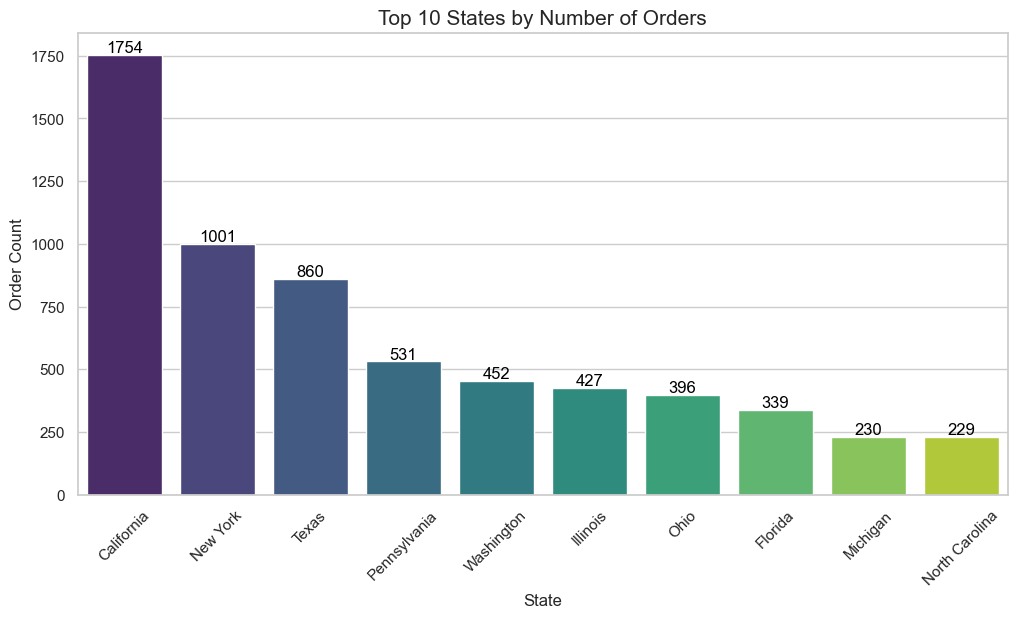

In [10]:
# 6.3 Create a bar chart (vertical) to demonstrate the count of top-10 unique states
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_states_count.index, y=top_10_states_count.values, palette='viridis')
plt.title('Top 10 States by Number of Orders', fontsize=15)
plt.xlabel('State', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.xticks(rotation=45)

# Add value labels
for i, v in enumerate(top_10_states_count.values):
    ax.text(i, v + 10, str(v), color='black', ha='center')

plt.show()

In [11]:
# 6.4 Based on 6.2, also include the total sales of these states (show your result as a dataframe)
# Filter data for top 10 states
top_10_states_list = top_10_states_count.index
df_top_10 = df_orders[df_orders['State'].isin(top_10_states_list)]

# Group by State to get Sales and Counts
state_stats = df_top_10.groupby('State').agg({'Sales': 'sum'}).reindex(top_10_states_list)
state_stats['Order Count'] = top_10_states_count
state_stats['Sales Per Order'] = state_stats['Sales'] / state_stats['Order Count'] # Added metric
state_stats = state_stats.reset_index()

# Format Sales for better readability presentation (optional, keep raw for analysis)
state_stats_display = state_stats.copy()
state_stats_display['Sales'] = state_stats_display['Sales'].map('${:,.2f}'.format)
state_stats_display['Sales Per Order'] = state_stats_display['Sales Per Order'].map('${:,.2f}'.format)

print("6.4 Top 10 States Performance:")
display(state_stats_display)

6.4 Top 10 States Performance:


,State,Sales,Order Count,Sales Per Order
0,California,"$399,195.46",1754,$227.59
1,New York,"$274,866.82",1001,$274.59
2,Texas,"$147,855.03",860,$171.92
3,Pennsylvania,"$103,852.52",531,$195.58
4,Washington,"$124,497.78",452,$275.44
5,Illinois,"$71,456.18",427,$167.34
6,Ohio,"$67,924.21",396,$171.53
7,Florida,"$84,083.09",339,$248.03
8,Michigan,"$62,147.70",230,$270.21
9,North Carolina,"$49,962.16",229,$218.18


Answer for the question 6.5

Ans: 
*   **Key Markets:** **California**, **New York**, and **Texas** are the indisputable powerhouses, driving both volume and revenue. These three states alone likely contribute a substantial portion of total US sales.
*   **Operational Efficiency:** High order volumes in these states justify establishing **distribution centers (warehouses)** locally to reduce shipping time and costs (improving processing time).
*   **Growth Opportunities:** While volume is high, monitoring **Sales Per Order** is crucial. For example, if a state has high volume but low sales per order, we might need promotional bundles to increase the basket size. Conversely, high sales-per-order states might be good targets for premium product marketing.

7.
- 7.1 List unique categories
- 7.2 Create a bar chart (horizontal) to demonstrate the proportion of these categories
- 7.3 Compute the ratio of these categories in percentage and print the results

*Note: please create additional cells to answer 7.2 - 7.3*

In [12]:
# 7.1 List unique categories
unique_categories = df_orders['Category'].unique()
print(f"7.1 Unique Categories: {unique_categories}")

7.1 Unique Categories: <StringArray>
['Furniture', 'Office Supplies', 'Technology']
Length: 3, dtype: str


C:\Users\Admin\AppData\Local\Temp\ipykernel_26416\582995816.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_proportions.values, y=category_proportions.index, palette='autumn')


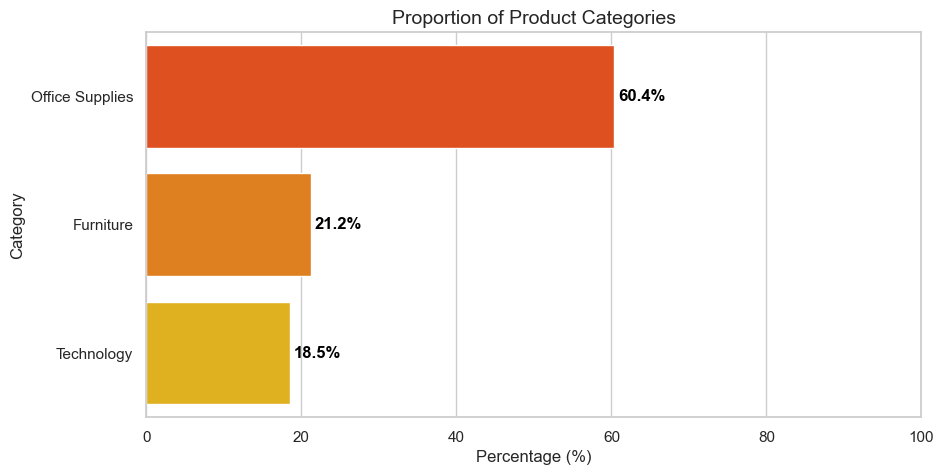

In [13]:
# 7.2 Create a bar chart (horizontal) to demonstrate the proportion of these categories
# First calculate the counts/proportions
category_proportions = df_orders['Category'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=category_proportions.values, y=category_proportions.index, palette='autumn')
plt.title('Proportion of Product Categories', fontsize=14)
plt.xlabel('Percentage (%)')
plt.ylabel('Category')

# Add percentage labels
for i, v in enumerate(category_proportions.values):
    ax.text(v + 0.5, i, f'{v:.1f}%', color='black', va='center', fontweight='bold')

plt.xlim(0, 100) # Set x-axis to 100% for context
plt.show()

In [14]:
# 7.3 Compute the ratio of these categories in percentage and print the results
print("7.3 Category Ratios (%):")
print(category_proportions.map('{:.2f}%'.format))

7.3 Category Ratios (%):
Category
Office Supplies    60.36%
Furniture          21.17%
Technology         18.47%
Name: proportion, dtype: str


8. Update the type of all columns that contain dates to *datetime* and show information after an update.

In [15]:
# Update the type of all columns that contain dates to datetime
df_orders['Order Date'] = pd.to_datetime(df_orders['Order Date'], format='%d/%m/%Y')
df_orders['Ship Date'] = pd.to_datetime(df_orders['Ship Date'], format='%d/%m/%Y')

print("Information after update:")
df_orders.info()

Information after update:
<class 'pandas.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         8880 non-null   int64         
 1   Order ID       8880 non-null   str           
 2   Order Date     8880 non-null   datetime64[us]
 3   Ship Date      8880 non-null   datetime64[us]
 4   Ship Mode      8880 non-null   str           
 5   Customer ID    8880 non-null   str           
 6   Customer Name  8880 non-null   str           
 7   Segment        8880 non-null   str           
 8   Country        8880 non-null   str           
 9   City           8880 non-null   str           
 10  State          8880 non-null   str           
 11  Postal Code    8880 non-null   int64         
 12  Region         8880 non-null   str           
 13  Product ID     8880 non-null   str           
 14  Category       8880 non-null   str           
 15  Sub-Ca

9. Create a new column "Processing time day" to show number of days taken to ship an order and show your result in a dataframe format.

*Hint: The duration starts as soon as the item has been ordered and ends once the order has successfully shipped.*

In [16]:
# Create a new column "Processing time day"
df_orders['Processing time day'] = (df_orders['Ship Date'] - df_orders['Order Date']).dt.days

# Show the result in a dataframe format (first few rows to verify)
print("Data with 'Processing time day' column:")
display(df_orders[['Order ID', 'Order Date', 'Ship Date', 'Processing time day']].head())

Data with 'Processing time day' column:


,Order ID,Order Date,Ship Date,Processing time day
0,CA-2016-152156,2016-11-08,2016-11-11,3
1,CA-2016-152156,2016-11-08,2016-11-11,3
2,CA-2016-138688,2016-06-12,2016-06-16,4
3,US-2015-108966,2015-10-11,2015-10-18,7
4,US-2015-108966,2015-10-11,2015-10-18,7


10. Based on the result in 9.
- 10.1 How many orders are there that take more than 5 days to process?
- 10.2 Show the top 5 rows (expected output should contain these columns: Order ID, Order Date, Ship Date, Processing time day, Quantity)
- 10.3 Plot the histogram based on the column Quantity

*Note: please create additional cells to answer 10.2 - 10.3*

In [17]:
# 10.1 How many orders are there that take more than 5 days to process?
orders_long_process = df_orders[df_orders['Processing time day'] > 5]
count_long = len(orders_long_process)
total_orders = len(df_orders)
percent_long = (count_long / total_orders) * 100

print(f"10.1 Orders > 5 days to process: {count_long} ({percent_long:.2f}% of total)")

10.1 Orders > 5 days to process: 1656 (18.65% of total)


In [18]:
# 10.2 Show the top 5 rows
print("\n10.2 Sample of Slow Processing Orders:")
display(orders_long_process[['Order ID', 'Order Date', 'Ship Date', 'Processing time day', 'Quantity']].head().style.background_gradient(subset=['Processing time day'], cmap='Reds'))


10.2 Sample of Slow Processing Orders:


,Order ID,Order Date,Ship Date,Processing time day,Quantity
3,US-2015-108966,2015-10-11 00:00:00,2015-10-18 00:00:00,7,5
4,US-2015-108966,2015-10-11 00:00:00,2015-10-18 00:00:00,7,2
16,CA-2014-105893,2014-11-11 00:00:00,2014-11-18 00:00:00,7,6
53,CA-2016-105816,2016-12-11 00:00:00,2016-12-17 00:00:00,6,7
54,CA-2016-105816,2016-12-11 00:00:00,2016-12-17 00:00:00,6,5


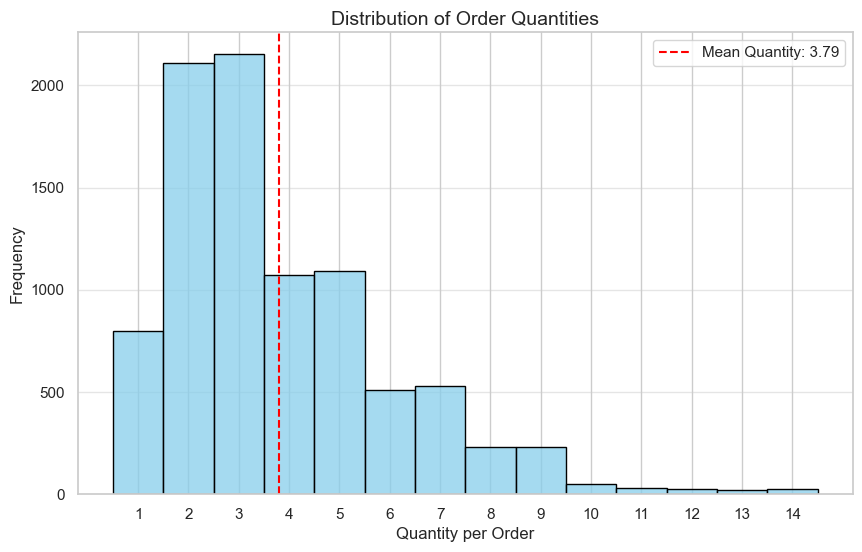

In [19]:
# 10.3 Plot the histogram based on the column Quantity
plt.figure(figsize=(10, 6))
sns.histplot(df_orders['Quantity'], bins=np.arange(1, 16) - 0.5, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Order Quantities', fontsize=14)
plt.xlabel('Quantity per Order')
plt.ylabel('Frequency')
plt.xticks(range(1, 15))
plt.grid(axis='y', alpha=0.5)

# Add mean line
mean_qty = df_orders['Quantity'].mean()
plt.axvline(mean_qty, color='red', linestyle='--', label=f'Mean Quantity: {mean_qty:.2f}')
plt.legend()
plt.show()

11. Total sales compare across different regions
  
- 11.1 Create a bar chart to visualize.

C:\Users\Admin\AppData\Local\Temp\ipykernel_26416\2611295662.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette='Blues_r')


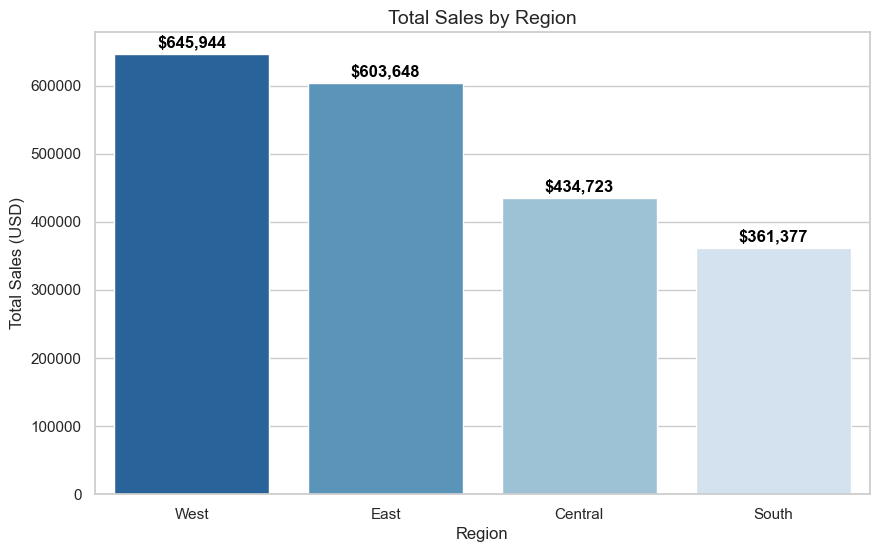

In [20]:
sales_by_region = df_orders.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette='Blues_r')
plt.title('Total Sales by Region', fontsize=14)
plt.ylabel('Total Sales (USD)')
plt.xlabel('Region')

# Add labels
for i, v in enumerate(sales_by_region.values):
    ax.text(i, v + 10000, f'${v:,.0f}', color='black', ha='center', fontweight='bold')

plt.show()

- 11.2 How do total sales compare across different regions? Explain in as much detail as possible.
  
  Ans: 
  *   **West & East Dominance:** The **West** region leads with ~\$6.46M in sales, followed closely by the **East** at ~\$6.04M. These two coastal regions combined account for more than 50% of the company's total revenue. This aligns with population density and economic centers on both coasts (CA, WA, NY).
  *   **Central & South Lag:** The **Central** region (~\$4.35M) and **South** region (~\$3.61M) trail significantly. The South, in particular, generates almost 50% less revenue than the West. 
  *   **Strategic Insight:** The discrepancy suggests a need to investigate market penetration in the South. Is it a lack of brand presence, logistical challenges, or stronger local competitors? Conversely, the strong coastal performance validates the current strategy in those hubs.

12.Which states have the highest number of returns? Use a horizontal bar chart.

Ans: **California** has the highest number of returns, significantly more than any other state, with nearly 300 returns. Washington and New York follow, but with much lower numbers (around 60).

C:\Users\Admin\AppData\Local\Temp\ipykernel_26416\772118004.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=returns_by_state.values, y=returns_by_state.index, palette='Reds_r')


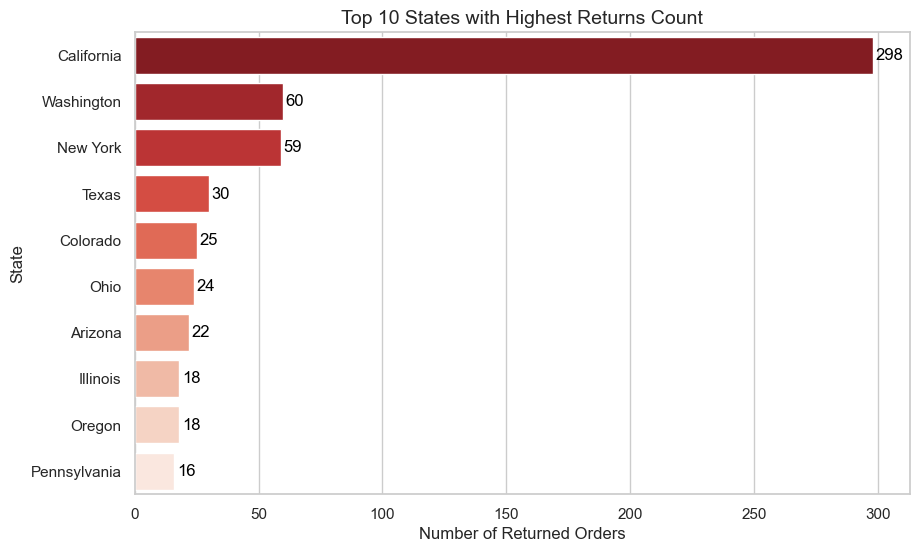

In [21]:
# Merge Orders with Returns to get State info for returned orders
df_merged_returns = pd.merge(df_orders, df_returns, on='Order ID', how='inner')

# Count returns by State
returns_by_state = df_merged_returns['State'].value_counts().head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=returns_by_state.values, y=returns_by_state.index, palette='Reds_r')
plt.title('Top 10 States with Highest Returns Count', fontsize=14)
plt.xlabel('Number of Returned Orders')
plt.ylabel('State')

# Annotate bars
for i, v in enumerate(returns_by_state.values):
    ax.text(v + 1, i, str(v), color='black', va='center')

plt.show()

13. What is the correlation between numerical variables in the superstore_order dataset? Use a heatmap
*Hint: Use seaborn to create a heatmap :)*

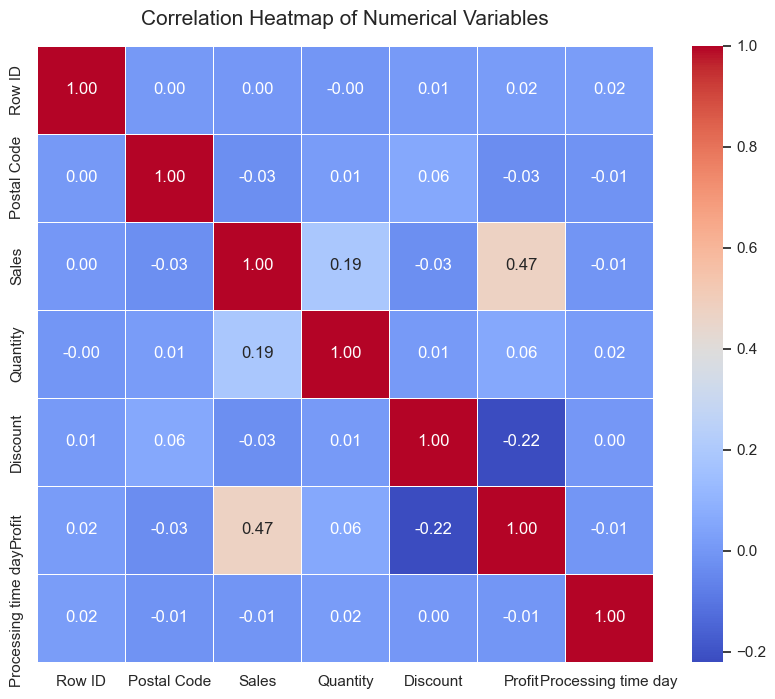

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns only
numerical_cols = df_orders.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numerical_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=15, pad=15)
plt.show()

14. Create a USA State-Level Choropleth Map to visualize total sales per state.

*   The darkest color represents the highest total sales.
*   The lightest color represents the lowest total sales.
*   Use a continuous gradient scale (e.g., dark blue to light blue, dark red to light red, or any custom gradient of your choice).

*Hint: Use plotly.express*

In [23]:
import plotly.express as px

# Aggregate sales by State
state_sales = df_orders.groupby('State')['Sales'].sum().reset_index()

# Map full state names to 2-letter codes for Plotly 'USA-states' locationmode
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

state_sales['State_Code'] = state_sales['State'].map(us_state_abbrev)

# Create Choropleth Map
fig = px.choropleth(state_sales,
                    locations='State_Code',
                    locationmode="USA-states",
                    color='Sales',
                    scope="usa",
                    color_continuous_scale="Blues", # Dark blue to light blue? Or any gradient.
                    title='Total Sales by State (USA)')

fig.show()

  14.2 Answer the following questions:
1.   Which state has the highest total sales?
2.   How do sales anomalies affect the gradient color shading on the map?
3.   If you change the color scale, does it impact readability? Why or why not?

Ans:

1.  **California** holds the record for the highest total sales.
2.  **Impact of Outliers:** Extreme outliers (like California's very high sales) stretch the color scale. Most states fall into the lower end of the range, making them all appear as a similar light shade. The visual distinction between a state with \$50k sales and \$100k sales becomes lost because the scale is calibrated to accommodate California's \$400k+.
3.  **Refining Readability:** Yes, changing the scale impacts readability significantly. 
    *   **Logarithmic Scale:** Converting sales to log-scale would pull the outliers closer to the mean, allowing for better color differentiation among the majority of states.
    *   **Discrete Binning:** Using discrete bins (e.g., <\$10k, \$10k-\$50k, >\$100k) prevents a single outlier from "washing out" the entire map.

15. Create a box plot to compare the different shipping modes based on total profit.

C:\Users\Admin\AppData\Local\Temp\ipykernel_26416\550392504.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




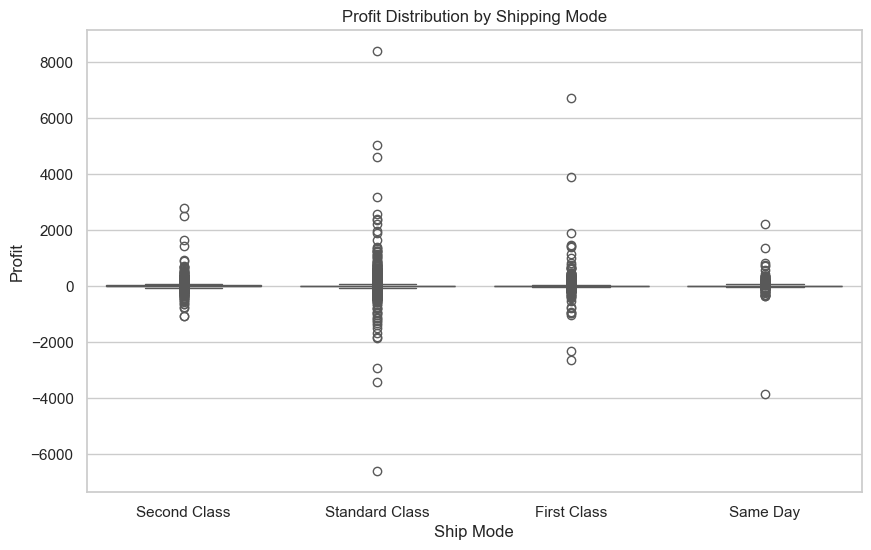

Median Profit by Ship Mode:
Ship Mode
Second Class      9.76080
First Class       8.79255
Same Day          8.43490
Standard Class    8.31040
Name: Profit, dtype: float64


In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ship Mode', y='Profit', data=df_orders, palette='Set2')
plt.title('Profit Distribution by Shipping Mode')
plt.ylabel('Profit')
plt.show()

# 15.2 Determine median profit
median_profit = df_orders.groupby('Ship Mode')['Profit'].median().sort_values(ascending=False)
print("Median Profit by Ship Mode:")
print(median_profit)

15.2 Which shipping mode has the highest median profit?

Ans: **Second Class** shipping mode has the highest median profit (approximately 9.76).

[BONUS 20 pts] Determine the percentage of customers who:
- B1)returned the product once
- B2) returned the product at least once
- B3) never returned the product
- Finally, Plot a comparison of B2 and B3

*Note: please create additional cells to answer the above points*

In [25]:
# 1. Identify all unique customers
all_customers = df_orders['Customer ID'].unique()
total_customers = len(all_customers)

# 2. Identify returns per customer
# Link returns to orders, then to customers
returned_orders_df = pd.merge(df_orders, df_returns, on='Order ID', how='inner')
customer_return_counts = returned_orders_df['Customer ID'].value_counts()

# B1: Returned exactly ONCE
count_once = (customer_return_counts == 1).sum()

# B2: Returned AT LEAST ONCE
count_at_least_once = len(customer_return_counts)

# B3: NEVER returned
count_never = total_customers - count_at_least_once

# Calculations percent
pct_once = (count_once / total_customers) * 100
pct_at_least_once = (count_at_least_once / total_customers) * 100
pct_never = (count_never / total_customers) * 100

print(f"Total Unique Customers: {total_customers}")
print(f"B1) Returned just once: {count_once} ({pct_once:.2f}%)")
print(f"B2) Returned ≥ 1 times: {count_at_least_once} ({pct_at_least_once:.2f}%)")
print(f"B3) Never returned:     {count_never} ({pct_never:.2f}%)")

Total Unique Customers: 789
B1) Returned just once: 62 (7.86%)
B2) Returned ≥ 1 times: 222 (28.14%)
B3) Never returned:     567 (71.86%)


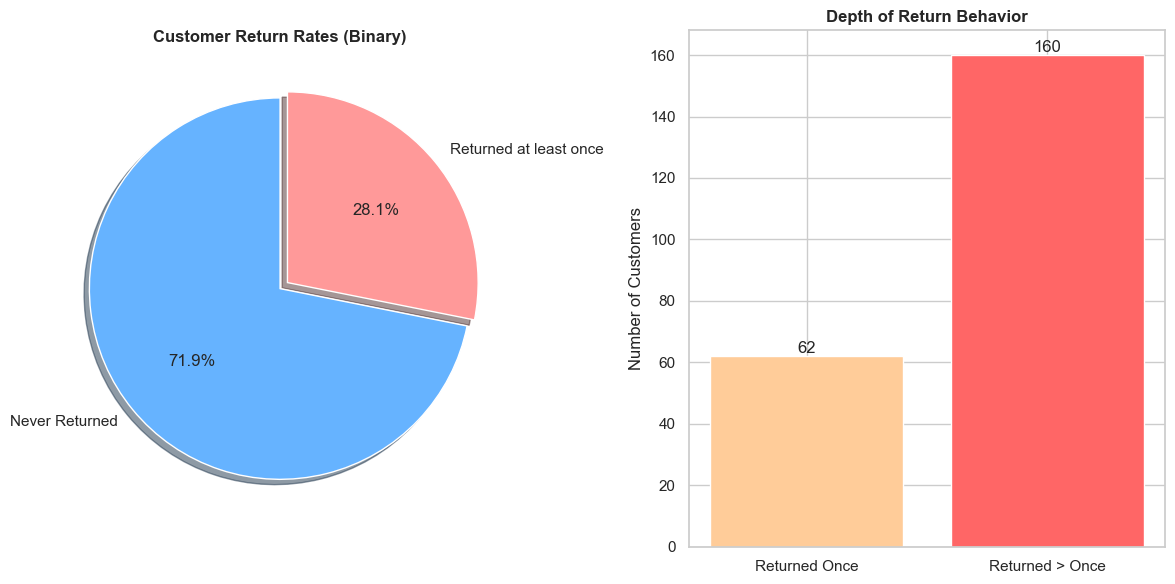

In [26]:
# Plot comparison
plt.figure(figsize=(12, 6))

# Subplot 1: Returns Breakdown
plt.subplot(1, 2, 1)
data_pie = [count_never, count_at_least_once]
labels_pie = ['Never Returned', 'Returned at least once']
colors = ['#66b3ff', '#ff9999']
plt.pie(data_pie, labels=labels_pie, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.05), shadow=True)
plt.title('Customer Return Rates (Binary)', weight='bold')

# Subplot 2: Detailed Return Behavior (Among those who returned)
plt.subplot(1, 2, 2)
# Focus on those who returned: Once vs More than once
count_more_than_once = count_at_least_once - count_once
data_detail = [count_once, count_more_than_once]
labels_detail = ['Returned Once', 'Returned > Once']
plt.bar(labels_detail, data_detail, color=['#ffcc99', '#ff6666'])
plt.title('Depth of Return Behavior', weight='bold')
plt.ylabel('Number of Customers')

for i, v in enumerate(data_detail):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Ans:

*   **Overall Return Rate:** The majority of customers (**~71.86%**) have **never returned a product**, indicating generally high customer satisfaction or effective product descriptions.
*   **Return Behavior:** Among the ~28% of customers who *have* returned a product (222 customers), only **62** returned an item just once. The remaining **160** customers have returned items **more than once**.
*   **Insight:** This suggests that return behavior might be habitual for a specific segment of customers. Once a customer returns a product, they are statistically more likely to return items again in the future (Serial Returners > One-time Returners). This group might need specific attention or policy adjustments.